# Variation temps

Liste des points : [(250.0, 250.0), (341, 174), (202, 378), (154, 440), (37, 311), (284, 262), (451, 326), (454, 419), (364, 36), (87, 285), (15, 130)]
Matrice d'adjacence 
 [[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Matrice d'adjacence pondérée 
 [[  0. 119.   0.   0.   0.   0. 215.   0.   0.   0. 264.]
 [119.   0. 247.   0.   0.   0.   0.   0.   0.   0. 329.]
 [  0. 247.   0.  78.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  78.   0. 174. 220.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 174.   0. 252.   0.   0. 427.   0.   0.]
 [  0.   0.   0. 220. 252.   0. 179.   0.   0.   0.   0.]
 [215.   0.   0.   0.   0. 179.   0.  93.   0.   0

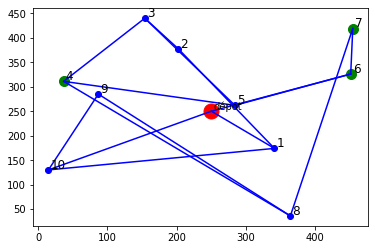

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1

            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 10
nbvoisins = 3
nbPackages = 3

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
package = randomPackages(nbPackages, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


## solution aleatoire

In [4]:
def generateSolution(matrix,package):

    packageLeft = package.copy()
    solution = [0]

    #print("Package : ", packageLeft)

    while(packageLeft):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
        if(randomNext in packageLeft):
            packageLeft.remove(randomNext)
    #print("Solution : ",solution)

    return solution


def solutionLength(solution):

    totalLength = 0
    for i in range(0,len(solution)-1):
        totalLength += matrix[solution[i]][solution[i+1]]

    return totalLength


UniqueRandomSolution = generateSolution(matrix, package)
print(UniqueRandomSolution)

[0, 1, 2, 3, 2, 1, 10, 9, 10, 0, 6, 7, 8, 4]


# Instance

In [5]:
def variationTraficTemps(solution, matrix):
    speed = 500
    startTime = 8
    currentTime = startTime
    totalDays = 0
    
    dict_speed_reduction_by_time = {8:0.5, 9:0.5, 10:0.6, 11:0.8, 12:0.6, 13:0.6, 14:0.8, 15:0.9, 16:0.7, 17:0.4, 18:0.5}
    #------------------------------------------------------------------------------------------------------------------------------------------------
    for p in range(0,len(solution)-1):
        print("iteration")
        print(currentTime)
        time2points = int((speed* dict_speed_reduction_by_time[currentTime]) / matrix[solution[p]][solution[p+1]])
        currentTime += time2points
        if ((18 - currentTime) < time2points):
            totalDays +=1
            currentTime = 8
        
    return([totalDays, currentTime])

result = variationTraficTemps(UniqueRandomSolution,matrix)
print("Nombre de jours: "+ str(result[0]))
print("Nombre d'heures en plus des jours: "+ str(result[1]))

iteration
8
iteration
10
iteration
11
iteration
8
iteration
11
iteration
12
iteration
12
iteration
13
iteration
14
iteration
15
iteration
8
iteration
10
iteration
10
Nombre de jours: 2
Nombre d'heures en plus des jours: 10
